# Adjusters

Here we plot different adjusters (also known as: lookback adjusters & capital/martingale calibrators) for illustration purposes.

Main references include [Shafer et al. (2011)](https://projecteuclid.org/journals/statistical-science/volume-26/issue-1/Test-Martingales-Bayes-Factors-and-p-Values/10.1214/10-STS347.full) and [Koolen and Vovk (2014)](https://www.sciencedirect.com/science/article/pii/S0304397514007087); also see paper's section on adjusters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ecombine as ec

In [2]:
ec.set_theme()

MAX_EXP = 10

In [3]:
adjuster_fns = {
    r"$A_{mix}$": ec.adjuster,
    # r"$A_{mix2}$": lambda e: (e - 1 - np.log(e + 1e-8)) / (np.log(e + 1e-8) ** 2),  # closed form
    r"$A_{KV}$": lambda e: ec.adjuster(e, use_kv=True),
    r"$A_{sqrt}$": lambda e: np.sqrt(e) - 1,
    r"$A_{1/2}$": lambda e: ec.adjuster(e, kappa=1/2),
    # r"$A_{1/4}$": lambda e: ec.adjuster(e, kappa=1/4),
    # r"$A_{zero,1/4}$": lambda e: ec.adjuster(e, kappa=1/4, use_zero=True),
    # r"$A_{zero,1/2}$": lambda e: ec.adjuster(e, kappa=1/2, use_zero=True),
    r"$A_{zero,1}$": lambda e: ec.adjuster(e, kappa=1, use_zero=True),
}

In [4]:
def plot_adjusters(adjuster_fns: dict, max_exp=MAX_EXP):
    """Plot different adjuster functions on log-scale axis using seaborn."""
    e = np.logspace(0, max_exp, 1000)
    y = np.array([fn(e) for _, fn in adjuster_fns.items()])
    df = pd.DataFrame(y.T, columns=[name for name in adjuster_fns])
    df['e'] = e
    df = df.melt(id_vars='e', var_name='Adjuster', value_name='A(e)')
    fg = sns.relplot(
        x='e', 
        y='A(e)', 
        hue='Adjuster',
        style="Adjuster",
        kind='line',
        linewidth=2.5,
        alpha=0.8,
        aspect=1.35, 
        height=5,
        data=df, 
        # facet_kws={"legend_out": False},
    )
    fg.set(
        xscale='log', 
        yscale='log',
        xlim=(10 ** -0.2, 10 ** (max_exp + 0.2)),
        ylim=(10 ** -1.2, 10 ** (max_exp - 2 + 0.2)),
        xticks=[10 ** i for i in range(0, max_exp + 1, 2)],
        yticks=[10 ** i for i in range(0, max_exp - 1, 2)],
    )
    return fg

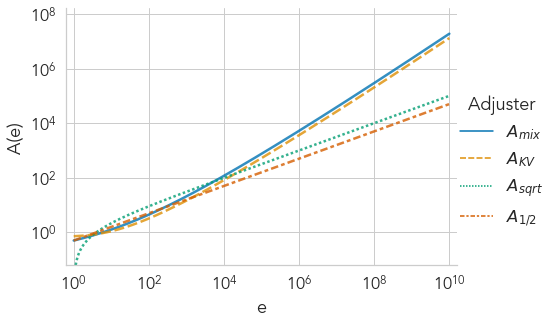

In [5]:
# exclude the zero adjuster
fg = plot_adjusters({k: v for k, v in adjuster_fns.items() 
                     if "zero" not in k}, max_exp=MAX_EXP)
fg.savefig("plots/adjusters.png", dpi=350)
fg.savefig("plots/adjusters.pdf", dpi=350)

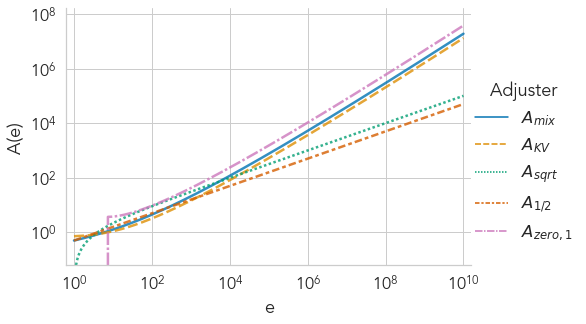

In [6]:
# include zero adjusters, exclude some others
fg = plot_adjusters({k: v for k, v in adjuster_fns.items() 
                     if any(kw in k for kw in ["zero", "mix", "KV", "sqrt", "1/2", "1/4"])}, max_exp=MAX_EXP)
fg.savefig("plots/adjusters_zero.png", dpi=350)
fg.savefig("plots/adjusters_zero.pdf", dpi=350)

In [7]:
# print values at smaller values
e_vals = np.array([1., 2., 4., 8., 16., 32., 64.])
for adj_name, adj_fn in adjuster_fns.items():
    with np.printoptions(precision=3, suppress=True):
        print(f"{adj_name:14s} |", adj_fn(e_vals))

$A_{mix}$      | [0.5   0.639 0.84  1.138 1.591 2.292 3.402]
$A_{KV}$       | [0.721 0.766 0.856 1.021 1.3   1.759 2.507]
$A_{sqrt}$     | [0.    0.414 1.    1.828 3.    4.657 7.   ]
$A_{1/2}$      | [0.5   0.707 1.    1.414 2.    2.828 4.   ]
$A_{zero,1}$   | [0.    0.    0.    3.7   4.163 5.328 7.4  ]
